In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Reading the data from input csv file into a Pandas DataFrame
computers = pd.read_csv("datasets/computers.csv") 
# Printing the first 5 rows
computers.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


Text(0, 0.5, 'Minutes')

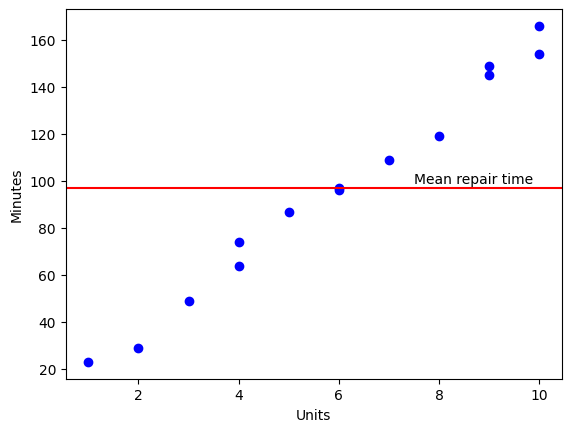

In [2]:
# Calculating the mean.
mean_value = computers['Minutes'].mean()
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'],computers['Minutes'],color='blue', marker='o')
# Plotting the mean
plt.axhline(y=mean_value,c="r")
# Adding annotation, xlabel and ylabel.
plt.annotate("Mean repair time",xy = (7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")



In [3]:
# Diffrent Regression Models
minutes_model0 = computers['Minutes'].mean()
minutes_model1 = 10 + 12*computers['Units']
minutes_model2 = 6 + 18*computers['Units']
computers['min_model0'] = minutes_model0
computers['min_model1'] = minutes_model1
computers['min_model2'] = minutes_model2

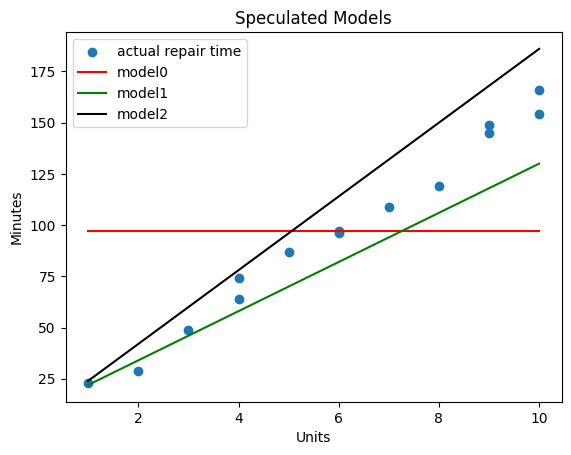

In [4]:
# Plotting Diffrent Models
fig,ax = plt.subplots()
# Plotting the actual 'Minutes'
ax.scatter(x="Units",y="Minutes",data=computers,label='actual repair time')
# Plotting the Model0 predictions
ax.plot(computers['Units'],computers['min_model0'],color="red",label='model0')
# Plotting the Model1 predictions
ax.plot(computers['Units'],computers['min_model1'],color="green",label='model1')
# Plotting the Model2 predictions
ax.plot(computers['Units'],computers['min_model2'],color="black",label='model2')
# Adding xlabel, ylabel, title and legend 
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()

In [5]:
model0_obs = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['min_model0'],
              "Error":(computers['min_model0'] - computers['Minutes'])})
print("\nModel 0 Observation")
print(model0_obs) # Printing the DataFrame

model1_obs = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['min_model1'],
              "Error":(computers['min_model1'] - computers['Minutes'])})
print("\nModel 1 Observation")
print(model1_obs) # Printing the DataFrame

model2_obs = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['min_model2'],
              "Error":(computers['min_model2'] - computers['Minutes'])})
print("\nModel 2 Observation")
print(model2_obs) # Printing the DataFrame


Model 0 Observation
    Units  Actual time  Predicted time      Error
0       1           23       97.214286  74.214286
1       2           29       97.214286  68.214286
2       3           49       97.214286  48.214286
3       4           64       97.214286  33.214286
4       4           74       97.214286  23.214286
5       5           87       97.214286  10.214286
6       6           96       97.214286   1.214286
7       6           97       97.214286   0.214286
8       7          109       97.214286 -11.785714
9       8          119       97.214286 -21.785714
10      9          149       97.214286 -51.785714
11      9          145       97.214286 -47.785714
12     10          154       97.214286 -56.785714
13     10          166       97.214286 -68.785714

Model 1 Observation
    Units  Actual time  Predicted time  Error
0       1           23              22     -1
1       2           29              34      5
2       3           49              46     -3
3       4           64  

In [6]:
# Sum of model error
print("Erorr Model 0 :",sum(model0_obs['Error']))
print("Erorr Model 1 :",sum(model1_obs['Error']))
print("Erorr Model 2 :",sum(model2_obs['Error']))

# Sum of Error Squared
print("Erorr square Model 0 :",sum(model0_obs['Error']**2))
print("Erorr square Model 1 :",sum(model1_obs['Error']**2))
print("Erorr square Model 2 :",sum(model2_obs['Error']**2))







Erorr Model 0 : 1.4210854715202004e-14
Erorr Model 1 : -213
Erorr Model 2 : 235
Erorr square Model 0 : 27768.357142857145
Erorr square Model 1 : 4993
Erorr square Model 2 : 5001


In [7]:
# Maually calculating best fit
x = computers.Units 
y = computers.Minutes
xiyi = x*y
n = len(computers)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator # m = (sigma(xiyi) - n*xbar*ybar)/(sigma(x^2) - nxbar^2)
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)

intercept :  4.161654135338296  coefficient :  15.508771929824569


In [8]:
# Estimated time taken to repair a computer = 4.16165 + 15.50877 * Number of faulty units
# y = mx + c
# Estimating time using the intercept and the coefficient of the best fit model
min_best_fit_model = c + m*computers.Units
# Adding the predicted values to the dataset
computers['min_best_fit_model'] = min_best_fit_model
# Printing the values predicted by the best fit model
computers[["Units","Minutes","min_best_fit_model"]]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best fit model line')

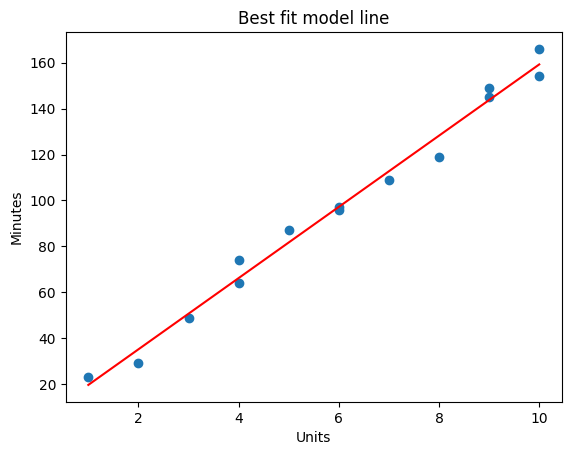

In [9]:
# Plotting the best fir Model
fig,ax = plt.subplots()
# Plotting the actual target values
ax.scatter(x="Units",y="Minutes",data=computers) 
# Plotting the target values predicted by the best fit model
ax.plot(computers.Units,computers.min_best_fit_model,color="red")
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best fit model line")

In [10]:
# Computing the individual errors for the best fit model
best_fit_model_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_best_fit_model,
              "Error":computers.min_best_fit_model - computers.Minutes})
best_fit_model_obs

,Units,Actual time,Predicted time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [11]:
# Sum of Squared Errors for the best fit model
sum(best_fit_model_obs.Error**2)

348.848370927318

In [12]:
# USing Package for Linear Regression
# Setting the 'Units' column as the input data or predictor column
X = computers[['Units']]
# Setting the 'Minutes' column as the output data or target column
y=computers['Minutes']
# Importing the required class
from sklearn.linear_model import LinearRegression
# Creating a linear regression model
model = LinearRegression()
# Fitting the model to the data i.e. building the model
model.fit(X, y)
# Fetching intercept and coefficient
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 4.161654135338296
Coefficients: [15.50877193]


In [13]:
# The intercept indicates the value of b0 and coefficients represents the remaining coefficient b1.

# Thus the best fit model becomes:

# Estimated time taken to repair a computer = 4.161654 + (15.50877 x Units being replaced)

In [14]:
# The computation of R2 for the best fit model built on computers dataset is shown below.
SST = sum((computers.Minutes.mean() - computers.Minutes)**2)
print("SST : ",SST)
# 27768.357142857145
SSE = sum(best_fit_model_obs.Error**2)
print("SSE : ",SSE)
# 348.848370927318
SSR = SST - SSE
print("SSR",SSR)
# 27419.508771929828
Rsq = SSR/SST
# Manually calculated
print("RSQ  ",Rsq)
# 0.9874371980620736
# USing score() function
Rsq1 = model.score(computers[["Units"]],y)
Rsq1
# 0.9874371980620736


#As shown in the code, the score() of the model directly computes the R^2 value.

# An R^2 value of 0.9874372 indicates that 98.74 % of the variability observed in the dependent variable (time taken to repair computer) can be explained by variability in the predictor variable (units being replaced) in this sample data set.

# R^2 can take values in the range 0 and 1. The higher the value of R2, the more useful is the model.

# This concludes our discussion of Simple Linear Regression.

SST :  27768.357142857145
SSE :  348.848370927318
SSR 27419.508771929828
RSQ   0.9874371980620736


0.9874371980620736